In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns
import pprint
import itertools
import random
from scipy import stats
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from factor_analyzer import FactorAnalyzer
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

C:\Users\balvi\anaconda3\Lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [484]:
title_text_metagenres_metascore_df = pd.read_hdf("./data/out/title_metasummary_metagenres_metascore_500_adjectives_20240420-161755_multilabel_10999.h5")
title_text_metagenres_metascore_df['meta_score'] = pd.to_numeric(title_text_metagenres_metascore_df['meta_score'])
title_text_metagenres_metascore_df['meta_genres'] = title_text_metagenres_metascore_df['meta_genres'].apply(lambda x: x if isinstance(x, list) and x != [] else ['No Genre'])

In [470]:
title_text_metagenres_metascore_df[list(title_text_metagenres_metascore_df.columns)[4:]] = -title_text_metagenres_metascore_df[list(title_text_metagenres_metascore_df.columns)[4:]]

In [471]:
title_text_metagenres_metascore_df = title_text_metagenres_metascore_df[list(title_text_metagenres_metascore_df.columns)[0:4]].join(title_text_metagenres_metascore_df[random.sample(list(title_text_metagenres_metascore_df.columns)[4:], 200)])

In [451]:
# Define the minimum and maximum samples per group
min_samples = 1
max_samples = 2000

# Function to sample from each group
def sample_group(group):
    # Check if the group size is at least min_samples
    if len(group) >= min_samples:
        return group.sample(n=min(max_samples, len(group)), replace=False)
    return pd.DataFrame()  # Return empty DataFrame for groups with less than min_samples

# Apply the function to each group
title_text_metagenres_metascore_df = title_text_metagenres_metascore_df.groupby('meta_score').apply(sample_group).reset_index(drop=True)

<Axes: >

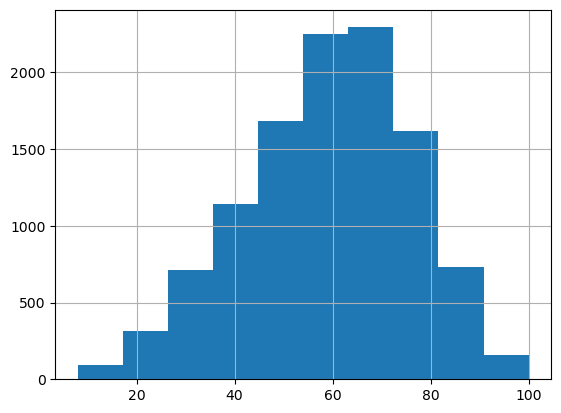

In [485]:
title_text_metagenres_metascore_df['meta_score'].hist()

In [ ]:
title_text_metagenres_metascore_df['meta_score'] = pd.cut(title_text_metagenres_metascore_df['meta_score'], bins=10, labels=False)
#title_text_metagenres_metascore_df = pd.get_dummies(title_text_metagenres_metascore_df, columns=['meta_score'])

In [ ]:
title_text_metagenres_metascore_df[title_text_metagenres_metascore_df['sublime']>0.9][['meta_summary_without_adjectives', 'meta_score']]

In [ ]:
title_text_metagenres_metascore_df.iloc[-1][0:4]

In [ ]:
title_text_metagenres_metascore_df.mean(numeric_only=True)

In [ ]:
corr_table = title_text_metagenres_metascore_df.corr(numeric_only=True)

In [ ]:
low_corr_columns = corr_table['meta_score'][1:][(corr_table['meta_score'][1:] > -0.15) & (corr_table['meta_score'][1:] < 0.15)]

In [ ]:
title_text_metagenres_metascore_df_high_corr = title_text_metagenres_metascore_df.drop(low_corr_columns.index.values, axis=1)

In [ ]:
title_text_metagenres_metascore_df_high_corr.columns

In [ ]:
df_z = result_df_clean.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)


In [ ]:
X = title_text_metagenres_metascore_df[list(title_text_metagenres_metascore_df.columns)[4:1561]]
y = title_text_metagenres_metascore_df['meta_score']
z_X = df_z[list(title_text_metagenres_metascore_df.columns)[4:]]
z_y = df_z['meta_score']

In [ ]:
list(result_df_clean.columns)[-24:-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lasso_cv = linear_model.LassoCV(alphas=None, cv=10, max_iter=100000, random_state=42, n_jobs=-1, verbose=True)
lasso_cv.fit(z_X, z_y)

In [ ]:
modelCV = linear_model.RidgeCV(alphas = [15000, 15250, 15275, 20000], store_cv_values = True)
modelCV.fit(X_train,y_train)
modelCV.alpha_, modelCV.score(X_test,y_test)

In [ ]:
print(f"Optimal alpha value: {lasso_cv.alpha_}")
print(f"Model coefficients: {lasso_cv.coef_}")

# To predict and evaluate:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lasso_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")
print(f"r2 on Test Set: {r2}")

In [ ]:
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
df_comparison

In [ ]:
#regr = make_pipeline(StandardScaler(), SVR(C=75, epsilon=0.2))
regr = SVR(C=125, epsilon=0.2)
regr.fit(X_train, y_train)

In [ ]:
regr.score(X_test, y_test)

In [ ]:
reg = linear_model.Ridge(alpha=1)
reg.fit(z_X, z_y)

In [ ]:
reg = linear_model.Lasso(alpha=0.03)
reg.fit(z_X, z_y)

In [ ]:
regr = linear_model.ElasticNetCV(random_state=0, max_iter=100000, alphas=None, n_jobs=-1, verbose=True)
regr.fit(z_X, z_y)

In [ ]:
print(regr.alpha_)

In [ ]:
print(regr.l1_ratio_)

In [ ]:
cdf = pd.DataFrame(reg.coef_, z_X.columns, columns=['Coefficients'])

In [ ]:
cdf.sort_values('Coefficients')

In [505]:

x_matrix = sm.add_constant(X)
model = sm.OLS(y, x_matrix)  # Initialize the OLS model

#best_alpha_CV:0.0322356962068846
# Now, fit the model with regularization. Example:
#result = model.fit_regularized(alpha=0.01,method='elastic_net',L1_wt=0.9,refit=True)
result = model.fit()
# checking results

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             meta_score   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     5.987
Date:                Sat, 20 Apr 2024   Prob (F-statistic):          4.10e-296
Time:                        16:43:05   Log-Likelihood:                -45332.
No. Observations:               10999   AIC:                         9.166e+04
Df Residuals:                   10499   BIC:                         9.532e+04
Df Model:                         499                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
results_as_html = result.summary().tables[1].as_html()
result_df = pd.read_html(results_as_html, header=0, index_col=0)[0]

In [ ]:
result_df[result_df['coef'] != 0].sort_values('coef', ascending=False)

In [ ]:
factor_df = title_text_metagenres_metascore_df[significant_corr_columns]
#factor_df = X

In [ ]:
factor_df = factor_df.loc[:,~factor_df.columns.duplicated()].copy().dropna()


In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(factor_df)
chi_square_value, p_value

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(factor_df)

In [ ]:
kmo_model

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None)
fa.fit(factor_df, 25)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()

In [ ]:
ev[:54]

In [ ]:
# Create scree plot using matplotlib
plt.scatter(range(1,factor_df.shape[1]+1),ev)
plt.plot(range(1,factor_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
fa = FactorAnalyzer(n_factors=53, rotation="varimax")
fa.fit(factor_df)

In [ ]:
loadings_df = pd.DataFrame(fa.loadings_,index=factor_df.columns)

In [ ]:
loadings_df[0].sort_values(ascending=False)

In [ ]:
# Given values
N = 10999  # Population size
z = 1.96  # Z-score for a 95% confidence level
E = 0.05  # Margin of error as a decimal

# Assuming p = 0.5 for maximum variability
p = 0.5

# Calculating the sample size without the finite population correction (FPC)
n_without_fpc = ((z**2) * p * (1-p)) / (E**2)

# Applying finite population correction (FPC)
n_with_fpc = n_without_fpc / (1 + ((n_without_fpc - 1) / N))

n_without_fpc, n_with_fpc

In [ ]:
list(title_text_metagenres_metascore_df.columns)[2:]

In [486]:
data_copy = title_text_metagenres_metascore_df.copy()

In [487]:
meta_genres = data_copy['meta_genres'].explode().unique()
meta_genres = meta_genres[~pd.isnull(meta_genres)]
meta_genres = list(meta_genres)

In [488]:


# Ensure the original DataFrame has a simple index to align with the crosstab result
data_copy.reset_index(drop=True, inplace=True)


# Explode the 'values' column
exploded_df = data_copy.explode('meta_genres').reset_index()

# Create a binary matrix indicating the presence of each unique value
binary_matrix = pd.crosstab(index=exploded_df['index'], columns=exploded_df['meta_genres'])

# Reset the index to ensure compatibility for merging
binary_matrix.reset_index(drop=True, inplace=True)

# Drop the original 'values' column to avoid column overlap
data_copy.drop('meta_genres', axis=1, inplace=True)

# Merge the binary matrix back into the original DataFrame without the 'values' column
result_df = pd.concat([data_copy, binary_matrix], axis=1)

In [489]:
result_df_clean = result_df.loc[:, ~result_df.columns.duplicated(keep='last')]

In [494]:
X = result_df_clean[list(result_df_clean.columns)[4:-28]]
y = result_df_clean['meta_score']

In [495]:
X.columns

Index(['seventeen', 'antimonic', 'tragicomical', 'unmelodious', 'utilized',
       'impressionist', 'otherwise', 'teenage', 'allegro', 'glial',
       ...
       'amphiprotic', 'liturgical', 'isochronous', 'oscillating',
       'nonsegregated', 'third', 'right-handed', 'hypertonic', 'anon.',
       'graded'],
      dtype='object', length=499)

In [496]:
meta_genre_df = result_df_clean[list(result_df_clean.columns)[-28:-1]]

In [497]:
meta_genre_df.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'No Genre',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Talk-Show', 'Thriller',
       'Unknown', 'War'],
      dtype='object')

Text(0.5, 1.0, 'meta_score')

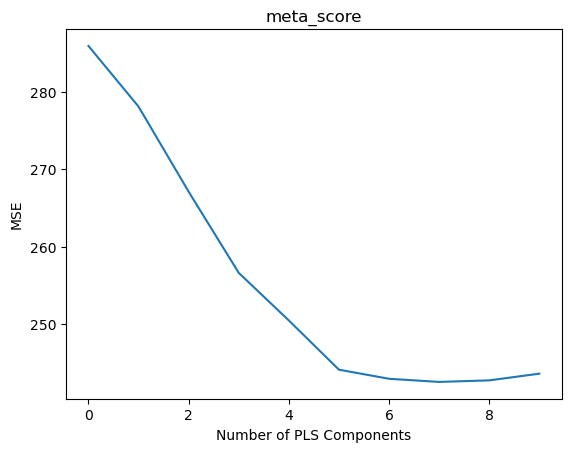

In [499]:


#define cross-validation method
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

mse = []
n = len(X)  # Assuming y is already defined

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(linear_model.LinearRegression(),
            np.ones((n, 1)), y, cv=cv, scoring='neg_mean_squared_error',error_score='raise').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 10):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('meta_score')

In [500]:

pls = PLSRegression(n_components=7)
pls.fit(scale(X), y)

# Extracting loadings
loadings = pls.x_loadings_

# Creating a DataFrame to display correlations nicely
correlations_df = pd.DataFrame(loadings, index=X.columns, 
                               columns=[f'Component {i+1}' for i in range(loadings.shape[1])])


In [504]:
correlations_df['Component 2'].sort_values(ascending=False) 

misleading                        0.101
cheeseparing                      0.100
asinine                           0.097
sulphuric                         0.093
sybaritic                         0.092
colloquial                        0.092
unsightly                         0.091
subjugated                        0.091
savourless                        0.091
wrong                             0.090
unreasonable                      0.087
surmisable                        0.087
derogatory                        0.087
dilettanteish                     0.086
isochronous                       0.086
cursed_with                       0.085
off-centered                      0.085
electromechanical                 0.083
intransitive                      0.083
pyrrhic                           0.083
underdone                         0.083
oppressive                        0.082
incertain                         0.082
detestable                        0.082
soggy                             0.082


In [503]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=0) 

#calculate RMSE
pls = PLSRegression(n_components=7)
pls.fit(scale(X_train), y_train)


mean_squared_error(y_test, pls.predict(scale(X_test)))

249.06810956842313

In [241]:
X_transformed_train = pls.transform(scale(X_train))
X_transformed_test = pls.transform(scale(X_test))
X_transformed = pls.transform(scale(X))

In [242]:
components_df = pd.DataFrame(X_transformed_train, columns=list(range(1, X_transformed.shape[1]+1)))

In [243]:
regress_data_df = components_df.join(meta_genre_df)

In [244]:
pg.partial_corr(data=regress_data_df.join(y), x=1, y='meta_score', covar=list(meta_genre_df.columns))

,n,r,CI95%,p-val
pearson,9474,0.009,"[-0.01, 0.03]",0.379


In [212]:
#X = X[covar_list+['sublime']]
x_matrix = sm.add_constant(regress_data_df)
model = sm.OLS(y, x_matrix)  # Initialize the OLS model

#best_alpha_CV:0.0322356962068846
# Now, fit the model with regularization. Example:
#result = model.fit_regularized(alpha=0.01,method='elastic_net',L1_wt=0.9,refit=True)
result = model.fit()

# checking results
print(result.summary())

ValueError: The indices for endog and exog are not aligned

In [ ]:
story_adjectives = [
    "Spellbinding", "Thrilling", "Provocative",
    "Gloomy", "Emotional", "Absurd",
    "Majestic", "Unpredictable", "Spiritual",
    "Eerie", "Chilling", "Enigmatic",
    "Informal", "Mesmerizing", "Stimulating",
    "Puzzling", "Remarkable", "Mind-boggling",
    "Intricate", "Straightforward", "Unforgettable",
    "Humorous", "Ridiculous", "Splendid",
    "Daring", "Frightening", "Realistic",
    "Addicting", "Passionate", "Exhilarating",
    "Action-filled", "Absorbing", "Fascinating",
    "Clever", "Monotonous", "Intense",
    "Imaginative", "Redundant", "Motivational",
    "Original", "Authentic", "Enlightening",
    "Surprising", "Genuine", "Educational",
    "Deformed", "Fruitful", "Historic",
    "Victorious", "Anticipated", "Amusing",
    "Sad", "Potent", "Moving",
    "Touching", "Touchy", "Sincere",
    "Evocative", "Stimulating", "Easygoing",
    "Repulsive", "Thrilling", "Energetic",
    "Engrossing", "Poignant", "Dull",
    "Silly", "Inconsistent", "Varied",
    "Glorious", "Entertaining", "Cunning",
    "Adjustable", "Engaging", "Profound",
    "Futuristic", "Captivating", "Misleading",
    "Remarkable", "Sentimental", "Intricate",
    "Intriguing", "Elusive", "Soothing",
    "Imaginative", "Instructional", "Delightful",
    "Charming", "Engrossing", "Outstanding",
    "Amazing", "Monotonous", "Credible"
]
story_adjectives = [story_adj.lower() for story_adj in story_adjectives if story_adj.lower() in data_copy.columns.values[3:]]

In [ ]:
story_elements_dict = {}
for story_adjective in story_adjectives:
    correlated_words_dict = {}
    for variable in data_copy.columns.values[3:]:
        if variable != story_adjective:
            p_corr = pg.partial_corr(data=result_df_clean,x=variable,y=story_adjective).round(5)
            correlated_words_dict[variable] = p_corr.iloc[0]
    story_elements_dict[story_adjective] = pd.DataFrame.from_dict(correlated_words_dict, orient='index')
    print(story_adjective)

In [ ]:
story_elements_dict['spellbinding'].sort_values('r', ascending=False)

In [ ]:
covariates = meta_genres + insignificant_corr_columns + ['through', 'sexually_attractive']

In [ ]:
corr_dict = {}
for variable in data_copy.columns.values[3:]:
    try:
        p_corr = pg.partial_corr(data=result_df_clean, x=variable, y='meta_score').round(3)
        corr_dict[variable] = p_corr.iloc[0]
    except AssertionError:
        print(variable)

In [ ]:
corr_df = pd.DataFrame.from_dict(corr_dict, orient='index')

In [ ]:
corr_df.sort_values('p-val', ascending=False)

In [ ]:
corr_df.loc['sublime']

In [ ]:
correlated_features = corr_df.sort_values('r', ascending=False).index.values

In [ ]:
significant_corr_columns = list(corr_df[corr_df['r']> 0.15].index.values)

In [ ]:
significant_corr_columns

In [ ]:
len(significant_corr_columns)

In [ ]:
corr_dict = {}
covar_list = []
for i in range(150):
    corr_dict = {}
    for variable in data_copy.columns.values[3:]:
        if variable not in ['sublime', 'meta_score']:
            covar_list.append(variable)
            p_corr = pg.partial_corr(data=result_df_clean, x='sublime', y='meta_score', covar=covar_list).round(3)
            corr_dict[variable] = p_corr.iloc[0]
            covar_list.remove(variable)

    corr_df = pd.DataFrame.from_dict(corr_dict, orient='index')
    best_covar = corr_df.sort_values('r', ascending=False).iloc[0]
    display(best_covar)
    covar_list.append(best_covar.name)

In [ ]:
covar_list

In [ ]:
corr_df = pd.DataFrame.from_dict(corr_dict, orient='index')

In [ ]:
corr_df.sort_values('r', ascending=False)

In [ ]:
def is_strictly_increasing(df):
    return all(df['r'].iloc[i] < df['r'].iloc[i+1] for i in range(len(df['r']) - 1))
def is_strictly_decreasing(df):
    return all(df['r'].iloc[i] > df['r'].iloc[i+1] for i in range(len(df['r']) - 1))

In [ ]:
corr_dict2 = {}
strict_inc_p_corr_dfs = []
strict_dec_p_corr_dfs = []
# Function to calculate partial correlation with dynamic variables
def calc_partial_corr(group, x, y,covar):
    # Calculate the partial correlation
    return pg.partial_corr(data=group, x=x, y=y, covar=covar)


for x1 in correlated_features:
   # if x1 in correlated_features:
    for x2 in correlated_features:
        if x1!=x2:
            try:
                p_corr = result_df_clean.groupby('meta_score').apply(lambda g: calc_partial_corr(g, x=x1, y=x2,covar=covariates)).round(3)
                corr_dict2[(x1, x2)] = p_corr
                if is_strictly_increasing(p_corr):
                    print((x1, x2))
                    display(p_corr)
                    strict_inc_p_corr_dfs.append({(x1, x2):p_corr})
                elif is_strictly_decreasing(p_corr):
                    print((x1, x2))
                    display(p_corr)
                    strict_dec_p_corr_dfs.append({(x1, x2):p_corr})
            except AssertionError:
                print("AssertionError: ",x1, x2)
  #  else:
    #    print(x1, "not in adjectives list....")
                
            


In [ ]:
dict_of_genre_dfs = {}
for genre in meta_genres:
    genre_df = title_text_metagenres_metascore_df[
        title_text_metagenres_metascore_df.meta_genres.apply(lambda x: genre in x)]
    dict_of_genre_dfs[genre] = genre_df

In [ ]:
for criterion in list(title_text_metagenres_metascore_df.columns)[4:]:
    display(criterion)
    for genre, genre_df in dict_of_genre_dfs.items():
        try:
            display(genre, pg.corr(genre_df[criterion], genre_df['meta_score']).round(3))
        except ValueError:
            pass

In [ ]:
dict_of_genre_dfs['Action'].sort_values('meta_score', ascending=False)

In [ ]:
dict_of_genre_dfs['Sci-Fi'].sort_values('meta_score', ascending=False)